# Sampling in Bayesian Network

In this assignment, we will implement diffrent methods of sampling and try to compare the methods by varying queries and number of samples. In the next section you will implement Bayesian Network as a Python class with these methods:

* CPT: returns conditional probability table of nodes
* PMF: returns probability mass function of given query
* Sampling: implementation of different sampling methods
    
We will use following BN in this problem.

<img src="Images/BN.png" width=1400 height=1200 />

In [ ]:
import random
random.seed(10)
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
############################################################
# import necessary packages in this cell                   #
# please set a random seed to get the same results in      #
# different runs (1 Points)                                #
############################################################

In [ ]:
def Choose_A():
    sample = np.random.binomial(n=1, p=0.8)
    return sample

def Choose_B():
    sample = np.random.binomial(n=1, p=0.55)
    return sample

def Choose_C(a,e):
    if e == 1 and a == 1:
        sample = np.random.binomial(n=1, p=0.05)
    elif e == 1 and a == 0:
        sample = np.random.binomial(n=1, p=0.15)
    elif e == 0 and a == 1:
        sample = np.random.binomial(n=1, p=0.5)
    else:
        sample = np.random.binomial(n=1, p=0.7)
    return sample

def Choose_D(a,c):
    if   c == 1 and a == 1:
        sample = np.random.binomial(n=1, p=0.67)
    elif c == 1 and a == 0:
        sample = np.random.binomial(n=1, p=0.65)
    elif c == 0 and a == 1:
        sample = np.random.binomial(n=1, p=0.5)
    else:
        sample = np.random.binomial(n=1, p=0.8)
    return sample

def Choose_E(b): 
    if b == 1 :
        sample = np.random.binomial(n=1, p=0.3)
    else:
        sample = np.random.binomial(n=1, p=0.9)
    return sample

def Choose_F(d):     
    if d == 1 :
        sample = np.random.binomial(n=1, p=0.2)
    else:
        sample = np.random.binomial(n=1, p=0.25) 
    return sample  

def Weight_A(val):
    if val==0:
        return 0.8
    else: 
        return 0.2
    
def Weight_B(val):
    if val==0:
        return 0.55
    else: 
        return 0.45
    
def Weight_C(val,a,e):
    if e == 1 and a == 1:
        if val==1:
            return 0.05
        return 0.95
    elif e == 1 and a == 0:
        if val==1:
            return 0.15
        return 0.85
    elif e == 0 and a == 1:
        if val==1:
            return 0.5
        return 0.5       
    else:
        if val==1:
            return 0.7
        return 0.3   
    
def Weight_D(val,a,c):
    if   c == 1 and a == 1:
        if val==1:
            return 0.67
        return 0.33        
    elif c == 1 and a == 0:
        if val==1:
            return 0.65
        return 0.35    
    elif c == 0 and a == 1:
        if val==1:
            return 0.5
        return 0.5  
    else:
        if val==1:
            return 0.8
        return 0.2

def Weight_E(val,b): 
    if b == 1 :
        if val==1:
            return 0.3
        return 0.7
    else:
        if val==1:
            return 0.9
        return 0.1
    
def Weight_F(val,d):     
    if d == 1 :
        if val==1:
            return 0.2
        return 0.8
    else:
        if val==1:
            return 0.25
        return 0.75 

In [ ]:
PA1 = 0.8
PA0 = 0.2
#####################
PB1 = 0.55
PB0 = 0.45
#####################
PC0_A0E0 = 0.3
PC1_A0E0 = 0.7
PC0_A1E0 = 0.5
PC1_A1E0 = 0.5
PC0_A0E1 = 0.85
PC1_A0E1 = 0.15
PC0_A1E1 = 0.95
PC1_A1E1 = 0.05
#####################
PD0_A0C0 = 0.2
PD1_A0C0 = 0.8
PD0_A1C0 = 0.5
PD1_A1C0 = 0.5
PD0_A0C1 = 0.35
PD1_A0C1 = 0.65
PD0_A1C1 = 0.33
PD1_A1C1 = 0.67
#####################
PE1_B1 = 0.3
PE1_B0 = 0.9
PE0_B1 = 0.7
PE0_B0 = 0.1
#####################
PF1_D1 = 0.2
PF1_D0 = 0.25
PF0_D1 = 0.8
PF0_D0 = 0.75

def Prob_A(c,d,e):
    p1 = globals()["PD"+str(d)+"_A1C"+str(c)] * globals()["PC"+str(c)+"_A1E"+str(e)]
    p2 = globals()["PD"+str(d)+"_A0C"+str(c)] * globals()["PC"+str(c)+"_A0E"+str(e)]
    p = p1 / (p1 + p2)
    return p

def Prob_B(e):
    p1 = globals()["PE"+str(e)+"_B1"]
    p2 = globals()["PE"+str(e)+"_B0"]
    p = p1 / (p1 + p2)
    return p

def Prob_C(a,e,d):
    p1 = globals()["PC1_A"+str(a)+"E"+str(e)] * globals()["PD"+str(d)+"_A"+str(a)+"C1"]
    p2 = globals()["PC0_A"+str(a)+"E"+str(e)] * globals()["PD"+str(d)+"_A"+str(a)+"C0"] 
    p = p1 / (p1 + p2)
    return p
                                                          
def Prob_D(a,c,f):
    p1 = globals()["PD1_A"+str(a)+"C"+str(c)] * globals()["PF"+str(f)+"_D1"]
    p2 = globals()["PD0_A"+str(a)+"C"+str(c)] * globals()["PF"+str(f)+"_D0"]
    p = p1 / (p1 + p2)
    return p

def Prob_E(a,b,c):
    p1 = globals()["PC"+str(c)+"_A"+str(a)+"E1"] * globals()["PE1_B"+str(b)]
    p2 = globals()["PC"+str(c)+"_A"+str(a)+"E0"] * globals()["PE0_B"+str(b)]
    p = p1 / (p1 + p2)
    return p

def Prob_F(d):
    p1 = globals()["PF1_D"+str(d)]
    p2 = globals()["PF0_D"+str(d)]
    p = p1 / (p1 + p2)
    return p

def Find_Prob(query):
    query_var = []
    query_val = []
    for i in range(len(query)):
        query_var.append(query[i][0])
        query_val.append(query[i][1])
    if 'A' in query_var:
        A_val = [query_val[query_var.index('A')]]
    else:
        A_val = [0,1]
    if 'B' in query_var:
        B_val = [query_val[query_var.index('B')]]
    else:
        B_val = [0,1]
    if 'C' in query_var:
        C_val = [query_val[query_var.index('C')]]
    else:
        C_val = [0,1]
    if 'D' in query_var:
        D_val = [query_val[query_var.index('D')]]
    else:
        D_val = [0,1]
    if 'E' in query_var:
        E_val = [query_val[query_var.index('E')]]
    else:
        E_val = [0,1]
    if 'F' in query_var:
        F_val = [query_val[query_var.index('F')]]
    else:
        F_val = [0,1]
    p = 0
    for i_A in range(len(A_val)):
        for i_B in range(len(B_val)):
            for i_C in range(len(C_val)): 
                for i_D in range(len(D_val)): 
                    for i_E in range(len(E_val)): 
                        for i_F in range(len(F_val)):
                            pa = globals()["PA"+str(A_val[i_A])]
                            pb = globals()["PB"+str(B_val[i_B])]
                            pe = globals()["PE"+str(E_val[i_E])+"_B"+str(B_val[i_B])]
                            pc = globals()["PC"+str(C_val[i_C])+"_A"+str(A_val[i_A])+"E"+str(E_val[i_E])]
                            pd = globals()["PD"+str(D_val[i_D])+"_A"+str(A_val[i_A])+"C"+str(C_val[i_C])]
                            pf = globals()["PF"+str(F_val[i_F])+"_D"+str(D_val[i_D])]
                            p += pa * pb * pe * pc * pd * pf
    return p

In [ ]:
class BN(object):
    """
    Bayesian Network implementation with sampling methods as a class
    Attributes
    ----------
    n: int
        number of variables
    G: dict
        Network representation as a dictionary. 
        {variable:[[children],[parents]]} # You can represent the network in other ways. This is only a suggestion.
    """
    
    def __init__(self) -> None:
        self.n = 7
        self.G = {
                    'A':[['C','D'],[]],
                    'B':[['E'],[]],
                    'C':[['D','G'],['A','E']],
                    'D':[['F','G'],['A','C']],
                    'E':[['C','G'],['B']],
                    'F':[[],['D']],
                    'G':[[],['C','D','E']],
        }
        
    def cpt(self, node, value) -> dict:

        """
        This is a function that returns cpt of the given node
        
        Parameters
        ----------
        node:
            a variable in the bayes' net
            
        Returns
        -------
        result: dict
            {
            value1:{{parent1:p1_value1, parent2:p2_value1, ...}: prob1, ...},
            value2: ...
            }
        """
        if node == 'A':
            if value == 1:
                result = {str({}):0.8}
            elif value == 0:
                result = {str({}):0.2} 
                
        elif node == 'B': 
            if value == 1:
                result = {str({}):0.55}
            elif value == 0:
                result = {str({}):0.45} 
                
        elif node == 'C': 
            if value == 1:
                result = {str({'A':0,'E':0}):0.7,
                          str({'A':0,'E':1}):0.15,
                          str({'A':1,'E':0}):0.5, 
                          str({'A':1,'E':1}):0.05,
                         }
            elif value == 0:
                result = {str({'A':0,'E':0}):0.3,
                          str({'A':0,'E':1}):0.85,
                          str({'A':1,'E':0}):0.5, 
                          str({'A':1,'E':1}):0.95,
                         }
                
        elif node == 'D':
            if value == 1:
                result = {str({'A':0,'C':0}):0.8,
                          str({'A':0,'C':1}):0.65,
                          str({'A':1,'C':0}):0.5, 
                          str({'A':1,'C':1}):0.67,
                         }
            elif value == 0:   
                result = {str({'A':0,'C':0}):0.2,
                          str({'A':0,'C':1}):0.35,
                          str({'A':1,'C':0}):0.5, 
                          str({'A':1,'C':1}):0.33,
                         }
                
        elif node == 'E': 
            if value == 1:
                result = {str({'B':0}):0.9,
                          str({'B':1}):0.3,
                         }
            elif value == 0:  
                result = {str({'B':0}):0.1,
                          str({'B':1}):0.7,
                         }
                
        elif node == 'F':
            if value == 1:
                result = {str({'D':0}):0.25,
                          str({'D':1}):0.2,
                         }
            elif value == 0:
                result = {str({'D':0}):0.75,
                          str({'D':1}):0.8,
                         }   
        return result
    
    def pmf(self, query, evidence) -> float:
        """
        This function gets a variable and its value as query and a list of evidences and returns probability mass function P(Q=q|E=e)
        
        Parameters
        ----------
        query:
            a variable and its value
            e.g. ('a', 1)
        evidence:
            list of variables and their values
            e.g. [('b', 0), ('c', 1)]
        
        Returns
        -------
        PMF: float
            P(query|evidence)
        """   
        p1 = Find_Prob(query+evidence)
        if len(evidence) == 0:
            p2 = 1
        else:
            p2 = Find_Prob(evidence)
        return p1/p2
    
    def sampling(self, query, evidence, sampling_method, num_iter, num_burnin = 1e2) -> float:
        """
        Parameters
        ----------
        query: list
            list of variables an their values
            e.g. [('a', 0), ('e', 1)]
        evidence: list
            list of observed variables and their values
            e.g. [('b', 0), ('c', 1)]
        sampling_method:
            "Prior", "Rejection", "Likelihood Weighting", "Gibbs"
        num_iter:
            number of the generated samples 
        num_burnin:
            (used only in gibbs sampling) number of samples that we ignore at the start for gibbs method to converge
            
        Returns
        -------
        probability: float
            approximate P(query|evidence) calculated by sampling
        """

        num_burnin = int(num_burnin)
        n = 1
        query_var = []
        query_val = []       
        evidence_var = []
        evidence_val = []
        for i in range(len(query)):
            query_var.append(query[i][0])
            query_val.append(query[i][1])
        for i in range(len(evidence)):
            evidence_var.append(evidence[i][0])
            evidence_val.append(evidence[i][1])
        Order = ['A', 'B', 'E', 'C', 'D', 'F']
        if sampling_method == "Prior" :
            Sample_Vector = np.zeros([num_iter,6])
            for i in range(num_iter):
                Sample_Vector[i,0] = Choose_A()
                Sample_Vector[i,1] = Choose_B()
                Sample_Vector[i,2] = Choose_E(b = Sample_Vector[i,1])
                Sample_Vector[i,3] = Choose_C(a = Sample_Vector[i,0], e = Sample_Vector[i,2])
                Sample_Vector[i,4] = Choose_D(a = Sample_Vector[i,0], c = Sample_Vector[i,3])
                Sample_Vector[i,5] = Choose_F(d = Sample_Vector[i,4])  
###############################################################################################################                 
            counter_query = 0
            counter_evidence = 0
            if len(evidence_var)==0:
                counter_evidence = num_iter
                for i in range(num_iter):
                    sample = Sample_Vector[i,:]
                    flag = True
                    for j in range(len(query_var)):
                        n = Order.index(query_var[j])
                        if sample[n] != query_val[j]:
                            flag = False
                            break
                    if flag ==  True:
                        counter_query += 1  
            else:
                for i in range(num_iter):
                    sample = Sample_Vector[i,:]
                    flag1 = True
                    for j in range(len(evidence_var)):
                        n = Order.index(evidence_var[j])
                        if sample[n] != evidence_val[j]:
                            flag1 = False    
                            break
                    if flag1 == True:
                        counter_evidence += 1  
                        flag2 = True
                        for j in range(len(query_var)):
                            n = Order.index(query_var[j])
                            if sample[n] != query_val[j]:
                                flag2 = False
                                break
                        if flag2 ==  True:
                            counter_query += 1  
            return counter_query/counter_evidence
###############################################################################################################          
        elif sampling_method == "Rejection" :
            Sample_Vector = np.zeros([num_iter,6])
            i = 0
            while i < num_iter:
                if 'A' in evidence_var:
                    sample = Choose_A()
                    if sample == evidence_val[evidence_var.index('A')]:
                        Sample_Vector[i,0] = sample
                    else:
                        continue
                else:
                    Sample_Vector[i,0] = Choose_A()
                    
                if 'B' in evidence_var:
                    sample = Choose_B()
                    if sample == evidence_val[evidence_var.index('B')]:
                        Sample_Vector[i,1] = sample
                    else:
                        continue
                else:
                    Sample_Vector[i,1] = Choose_B()
                
                if 'E' in evidence_var:
                    sample = Choose_E(b = Sample_Vector[i,1])
                    if sample == evidence_val[evidence_var.index('E')]:
                        Sample_Vector[i,2] = sample
                    else:
                        continue
                else:
                    Sample_Vector[i,2] = Choose_E(b = Sample_Vector[i,1])
                
                if 'C' in evidence_var: 
                    sample = Choose_C(a = Sample_Vector[i,0], e = Sample_Vector[i,2])
                    if sample == evidence_val[evidence_var.index('C')]:
                        Sample_Vector[i,3] = sample
                    else:
                        continue                        
                else:
                    Sample_Vector[i,3] = Choose_C(a = Sample_Vector[i,0], e = Sample_Vector[i,2])
                    
                if 'D' in evidence_var: 
                    sample = Choose_D(a = Sample_Vector[i,0], c = Sample_Vector[i,3])
                    if sample == evidence_val[evidence_var.index('D')]:
                        Sample_Vector[i,4] = sample
                    else:
                        continue                        
                else:
                    Sample_Vector[i,4] = Choose_D(a = Sample_Vector[i,0], c = Sample_Vector[i,3])                
                    
                if 'F' in evidence_var: 
                    sample = Choose_F(d = Sample_Vector[i,4])    
                    if sample == evidence_val[evidence_var.index('F')]:
                        Sample_Vector[i,5] = sample
                    else:
                        continue                        
                else:
                    Sample_Vector[i,5] = Choose_F(d = Sample_Vector[i,4])              
                i += 1
###############################################################################################################                 
            counter_evidence = num_iter
            counter_query = 0
            for i in range(num_iter):
                sample = Sample_Vector[i,:]
                flag = True
                for j in range(len(query_var)):
                    n = Order.index(query_var[j])
                    if sample[n] != query_val[j]:
                        flag = False
                        break
                if flag ==  True:
                    counter_query += 1  
            return counter_query/counter_evidence
###############################################################################################################         
        elif sampling_method == "Likelihood Weighting" :
            Sample_Vector = np.zeros([num_iter,6])
            weights = np.ones([num_iter])
            for i in range(num_iter):
                if 'A' in evidence_var:
                    Sample_Vector[i,0] = evidence_val[evidence_var.index('A')]
                    weights[i] *=  Weight_A(val = Sample_Vector[i,0])
                else:
                    Sample_Vector[i,0] = Choose_A()
                    
                if 'B' in evidence_var:
                    Sample_Vector[i,1] = evidence_val[evidence_var.index('B')]
                    weights[i] *=  Weight_B(val = Sample_Vector[i,1])
                else:
                    Sample_Vector[i,1] = Choose_B()
                    
                if 'E' in evidence_var:
                    Sample_Vector[i,2] = evidence_val[evidence_var.index('E')]
                    weights[i] *=  Weight_E(val = Sample_Vector[i,2], b = Sample_Vector[i,1])
                else:
                    Sample_Vector[i,2] = Choose_E(b = Sample_Vector[i,1])
                
                if 'C' in evidence_var:
                    Sample_Vector[i,3] = evidence_val[evidence_var.index('C')]
                    weights[i] *=  Weight_C(val = Sample_Vector[i,2], a = Sample_Vector[i,0], e = Sample_Vector[i,2])
                else:
                    Sample_Vector[i,3] = Choose_C(a = Sample_Vector[i,0], e = Sample_Vector[i,2])
                
                if 'D' in evidence_var:
                    Sample_Vector[i,4] = evidence_val[evidence_var.index('D')]
                    weights[i] *=  Weight_D(val = Sample_Vector[i,2], a = Sample_Vector[i,0], c = Sample_Vector[i,3])
                else:
                    Sample_Vector[i,4] = Choose_D(a = Sample_Vector[i,0], c = Sample_Vector[i,3]) 
                    
                if 'F' in evidence_var:
                    Sample_Vector[i,5] = evidence_val[evidence_var.index('F')]
                    weights[i] *=  Weight_F(val = Sample_Vector[i,2], d = Sample_Vector[i,4])
                else: 
                    Sample_Vector[i,5] = Choose_F(d = Sample_Vector[i,4])      
############################################################################################################### 
            counter_evidence = np.sum(weights)
            counter_query = 0
            for i in range(num_iter):
                sample = Sample_Vector[i,:]
                flag = True
                for j in range(len(query_var)):
                    n = Order.index(query_var[j])
                    if sample[n] != query_val[j]:
                        flag = False
                        break
                if flag ==  True:
                    counter_query += weights[i] 
            return counter_query/counter_evidence
###############################################################################################################         
        if sampling_method == "Gibbs" :
            Sample_Vector = np.zeros([num_iter,6])
            initial_vector = np.random.binomial(n=1, p=0.5 , size=(6))
            # Order = ['A', 'B', 'E', 'C', 'D', 'F']
            for i in range(num_burnin):
                initial_vector[0] = np.random.binomial(n=1, p=Prob_A(c = initial_vector[3], d = initial_vector[4], e = initial_vector[2]))
                initial_vector[1] = np.random.binomial(n=1, p=Prob_B(e = initial_vector[2]))
                initial_vector[2] = np.random.binomial(n=1, p=Prob_E(a = initial_vector[0] , b = initial_vector[1] , c = initial_vector[3]))
                initial_vector[3] = np.random.binomial(n=1, p=Prob_C(a = initial_vector[0] , e = initial_vector[2] , d = initial_vector[4]))
                initial_vector[4] = np.random.binomial(n=1, p=Prob_D(a = initial_vector[0] , c = initial_vector[3] , f = initial_vector[5]))
                initial_vector[5] = np.random.binomial(n=1, p=Prob_F(d = initial_vector[4]))
            Sample_Vector[0,:] = initial_vector
            for i in range(1,num_iter):   
                Sample_Vector[i,0] = np.random.binomial(n=1, p=Prob_A(c = initial_vector[3], d = initial_vector[4], e = initial_vector[2]))
                Sample_Vector[i,1] = np.random.binomial(n=1, p=Prob_B(e = initial_vector[2]))
                Sample_Vector[i,2] = np.random.binomial(n=1, p=Prob_E(a = initial_vector[0] , b = initial_vector[1] , c = initial_vector[3]))
                Sample_Vector[i,3] = np.random.binomial(n=1, p=Prob_C(a = initial_vector[0] , e = initial_vector[2] , d = initial_vector[4]))
                Sample_Vector[i,4] = np.random.binomial(n=1, p=Prob_D(a = initial_vector[0] , c = initial_vector[3] , f = initial_vector[5]))
                Sample_Vector[i,5] = np.random.binomial(n=1, p=Prob_F(d = initial_vector[4]))
                initial_vector = Sample_Vector[i,:]
                initial_vector = np.int8(initial_vector)
                
###############################################################################################################                 
            counter_query = 0
            counter_evidence = 0
            if len(evidence_var)==0:
                counter_evidence = num_iter
                for i in range(num_iter):
                    sample = Sample_Vector[i,:]
                    flag = True
                    for j in range(len(query_var)):
                        n = Order.index(query_var[j])
                        if sample[n] != query_val[j]:
                            flag = False
                            break
                    if flag ==  True:
                        counter_query += 1  
            else:
                for i in range(num_iter):
                    sample = Sample_Vector[i,:]
                    flag1 = True
                    for j in range(len(evidence_var)):
                        n = Order.index(evidence_var[j])
                        if sample[n] != evidence_val[j]:
                            flag1 = False    
                            break
                    if flag1 == True:
                        counter_evidence += 1  
                        flag2 = True
                        for j in range(len(query_var)):
                            n = Order.index(query_var[j])
                            if sample[n] != query_val[j]:
                                flag2 = False
                                break
                        if flag2 ==  True:
                            counter_query += 1  
            return counter_query/counter_evidence

In [ ]:
My_Bn = BN()
a = My_Bn.sampling(query = [('A', 0), ('E', 1)],  evidence = [('B', 0), ('C', 1)], 
                   sampling_method = "Prior", num_iter =10000, num_burnin = 1e2)
print(a)
b = My_Bn.sampling(query = [('A', 0), ('E', 1)],  evidence = [('B', 0), ('C', 1)], 
                   sampling_method = "Rejection", num_iter =10000, num_burnin = 1e2)
print(b)
c = My_Bn.sampling(query = [('A', 0), ('E', 1)],  evidence = [('B', 0), ('C', 1)], 
                   sampling_method = "Likelihood Weighting", num_iter =10000, num_burnin = 1e2)
print(c)

d = My_Bn.sampling(query = [('A', 0), ('E', 1)],  evidence = [('B', 0), ('C', 1)], 
                   sampling_method = "Gibbs", num_iter =10000, num_burnin = 1e2)
print(d)

0.22376237623762377
0.2247
0.24676562712787792
0.29271523178807946


In [ ]:
a = My_Bn.sampling(query = [('B', 0)],  evidence = [], 
                   sampling_method = "Prior", num_iter =10000, num_burnin = 1e2)
print(a)
b = My_Bn.sampling(query = [('B', 0)],  evidence = [], 
                   sampling_method = "Rejection", num_iter =10000, num_burnin = 1e2)
print(b)
c = My_Bn.sampling(query = [('B', 0)],  evidence = [], 
                   sampling_method = "Likelihood Weighting", num_iter =10000, num_burnin = 1e2)
print(c)

d = My_Bn.sampling(query = [('B', 0)],  evidence = [], 
                   sampling_method = "Gibbs", num_iter =10000, num_burnin = 1e2)
print(d)

0.4483
0.4598
0.4479
0.4914


In [ ]:
print(My_Bn.pmf([('A', 1)], []))
print(My_Bn.pmf([('B', 1)], []))
print(My_Bn.pmf([('A', 1),('B', 1)], []))
print(My_Bn.pmf([('A', 1)], [('B', 1)]))
print(My_Bn.pmf([('F', 1)], []))
print(My_Bn.pmf([('F', 1)], [('A', 1),('E', 0)]))
print(My_Bn.pmf([('F', 1),('A', 1),('E', 0)], []))
print(My_Bn.pmf([('A', 1),('E', 0)], []))
print(My_Bn.pmf([('F', 1)], [('D', 1)]))

0.7999999999999998
0.5500000000000002
0.44
0.7999999999999998
0.22092394999999998
0.22075000000000003
0.075938
0.344
0.19999999999999998


In this part you will compare sampling results with real probabilities for these settings:

* query: $P(F=1|A=1,E=0)$ , $P(C=0,B=1|F=1,D=0)$
* number of samples: 100, 500, 1000, 3000, 10000, 50000

First find the probabilities with inference methods, then find the approximate probabilities for the queries with sampling methods with different number of samples. At the end, you will plot errors of diffrent methods by number of samples.

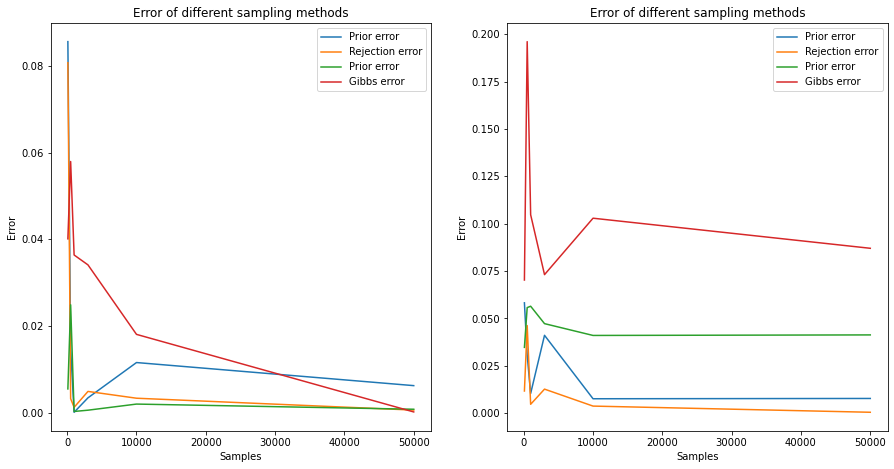

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (15,7.5))
p1 = My_Bn.pmf([('F', 1)], [('A', 1),('E', 0)])
Prior_result = np.zeros(6)
Rejection_result = np.zeros(6)
Weighting_result = np.zeros(6)
Gibbs_result = np.zeros(6)
samples = [100, 500, 1000, 3000, 10000, 50000]
for i in range(6):
    sample_num = samples[i]
    Prior_result[i] = My_Bn.sampling(query = [('F', 1)],  evidence = [('A', 1),('E', 0)], 
                                    sampling_method = "Prior", num_iter =sample_num, num_burnin = 1e2)
    Rejection_result[i] = My_Bn.sampling(query = [('F', 1)],  evidence = [('A', 1),('E', 0)], 
                                    sampling_method = "Rejection", num_iter =sample_num, num_burnin = 1e2)
    Weighting_result[i] = My_Bn.sampling(query = [('F', 1)],  evidence = [('A', 1),('E', 0)], 
                                    sampling_method = "Likelihood Weighting", num_iter =sample_num, num_burnin = 1e2)    
    Gibbs_result[i] = My_Bn.sampling(query = [('F', 1)],  evidence = [('A', 1),('E', 0)], 
                                    sampling_method = "Gibbs", num_iter =sample_num, num_burnin = 1e2)    

Prior_error = np.abs(Prior_result - p1)
Rejection_error = np.abs(Rejection_result - p1)
Weighting_error = np.abs(Weighting_result - p1)
Gibbs_error = np.abs(Gibbs_result - p1)
ax1.plot(samples, Prior_error, label='Prior error')
ax1.plot(samples, Rejection_error, label='Rejection error')
ax1.plot(samples, Weighting_error, label='Prior error')
ax1.plot(samples, Gibbs_error, label='Gibbs error')
ax1.set_xlabel("Samples")
ax1.set_ylabel("Error")
ax1.title.set_text("Error of different sampling methods")
ax1.legend()



p2 = My_Bn.pmf([('C', 0),('B', 1)], [('F', 1),('D', 0)])
Prior_result = np.zeros(6)
Rejection_result = np.zeros(6)
Weighting_result = np.zeros(6)
Gibbs_result = np.zeros(6)
samples = [100, 500, 1000, 3000, 10000, 50000]
for i in range(6):
    sample_num = samples[i]
    Prior_result[i] = My_Bn.sampling(query = [('C', 0),('B', 1)],  evidence = [('F', 1),('D', 0)], 
                                    sampling_method = "Prior", num_iter =sample_num, num_burnin = 1e2)
    Rejection_result[i] = My_Bn.sampling(query = [('C', 0),('B', 1)],  evidence = [('F', 1),('D', 0)], 
                                    sampling_method = "Rejection", num_iter =sample_num, num_burnin = 1e2)
    Weighting_result[i] = My_Bn.sampling(query = [('C', 0),('B', 1)],  evidence = [('F', 1),('D', 0)], 
                                    sampling_method = "Likelihood Weighting", num_iter =sample_num, num_burnin = 1e2)    
    Gibbs_result[i] = My_Bn.sampling(query = [('C', 0),('B', 1)],  evidence = [('F', 1),('D', 0)], 
                                    sampling_method = "Gibbs", num_iter =sample_num, num_burnin = 1e2)    

Prior_error = np.abs(Prior_result - p2)
Rejection_error = np.abs(Rejection_result - p2)
Weighting_error = np.abs(Weighting_result - p2)
Gibbs_error = np.abs(Gibbs_result - p2)
ax2.plot(samples, Prior_error, label='Prior error')
ax2.plot(samples, Rejection_error, label='Rejection error')
ax2.plot(samples, Weighting_error, label='Prior error')
ax2.plot(samples, Gibbs_error, label='Gibbs error')
ax2.set_xlabel("Samples")
ax2.set_ylabel("Error")
ax2.title.set_text("Error of different sampling methods")
ax2.legend()

For Gibbs sampling, try diffrent burnin values and report the accuracy (or error).

Text(0.5, 1.0, 'Error of different burnin values')

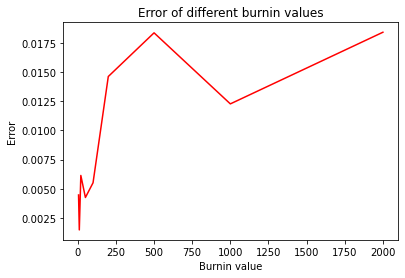

In [ ]:
burnin_values=[5,10,20,50,100,200,500,1000,2000]
p1 = My_Bn.pmf([('F', 1)], [('A', 1),('E', 0)])
Gibbs_result = np.zeros(len(burnin_values))
for i in range(len(burnin_values)):
    samples = burnin_values[i]
    Gibbs_result[i] = My_Bn.sampling(query = [('F', 1)],  evidence = [('A', 1),('E', 0)], 
                                    sampling_method = "Gibbs", num_iter =5000, num_burnin = samples) 
Gibbs_error = np.abs(Gibbs_result - p1)
plt.plot(burnin_values, Gibbs_error, color='r', label='Gibbs error')
plt.xlabel("Burnin value")
plt.ylabel("Error")
plt.title("Error of different burnin values")